In [2]:
# execute to import notebook styling for tables and width etc.
from IPython.core.display import HTML
import urllib.request
response = urllib.request.urlopen('https://raw.githubusercontent.com/DataScienceUWL/DS775v2/master/ds755.css')
HTML(response.read().decode("utf-8"));

In [54]:
# imports
%matplotlib notebook
import numpy as np
from scipy import interpolate
from scipy.optimize import minimize
import babel.numbers as numbers
import ipopt
import matplotlib.pyplot as plt

<font size=18>Homework 04: Quadratic Programming and Local Optimization</font>

# Textbook 13-7.2

Consider the following quadratic programming problem:

Maximize $f(x_1, x_2) = 8x_1 - x_1^2 + 4x_2 - x_2^2,$

subject to $x_1 + x_2 \leq 2, x_1 \geq 0, x_2 \geq 0.$

Use Pyomo with the `ipopt` solver to find the solution.  Include nicely formatted output.

<font color = "blue"> *** 4 points -  code in cell below *** (don't delete this cell) </font>

In [48]:
from pyomo.environ import *

# Concrete Model
model = ConcreteModel(name="prob1")

xvars = ['x1', 'x2']
model.variables = Var(xvars, domain=NonNegativeReals)

# Objective
model.f = Objective(expr=8*model.variables['x1'] - model.variables['x1']**2 + 
                        4*model.variables['x2'] - model.variables['x2']**2,
                         sense=pyo.maximize)

# Constraints
model.Constraint1 = Constraint(expr= model.variables['x1'] + model.variables['x2'] <= 2)

# Solve
solver = SolverFactory('/Users/ebolotin/anaconda3/bin/ipopt')
solver.solve(model)

# display(model)

# display solution
x1 = model.variables['x1']()
x2 = model.variables['x2']()
print(f"F = {model.f()}")
print(f"{x1}, {x2}")

F = 12.000000076376075
1.9999631668254136, 3.6852947311154154e-05


# Textbook 13-7.6

A stockbroker, Richard Smith, has just received a call from his most important client, Ann Hardy. Ann has $50,000 to invest and wants to use it to purchase two stocks. Stock 1 is a solid blue-chip security with a respectable growth potential and little risk involved. Stock 2 is much more speculative. It is being touted in two investment newsletters as having outstanding growth potential but also is considered very risky. Ann would like a large return on her investment but also has considerable aversion to risk. Therefore, she has instructed Richard to analyze what mix of investments in the two stocks would be appropriate for her.

Ann is used to talking in units of thousands of dollars and 1,000-share blocks of stocks. Using these units, the price per block is 20 for stock 1 and 30 for stock 2. After doing some research, Richard has made the following estimates. The expected return per block is 5 for stock 1 and 10 for stock 2. The variance of the return on each block is 4 for stock 1 and 100 for stock 2. The covariance of the return on one block each of the two stocks is 5.  Note that there are two covariance terms in the formula below
* Price per block: 20 (x1) and 30 (x2)
* Return per block: 5 (x1) and 10 (x2)
* Variance per block: 4 (x1) and 100 (x2)
* Covariance x1,x2: 5
* Budget: 50,000

The equations for portfolio analysis are on page 551.  The summation notation makes the equations a bit cumbersome so here they are written out as they apply to this problem.  Let $x_1$ and $x_2$ be blocks of stock 1 and stock 2, respectively.  The problem becomes

Minimize $V(x_1,x_2) = \sigma_{11} x_1^2 + \sigma_{12} x_1 x_2 + \sigma_{21} x_2 x_1 + \sigma_{22} x_2^2,$

Subject to $\mu_1 x_1 + \mu_2 x_2 \geq L, P_1 x_1 + P_2 x_2 \leq B, x_1 \geq 0, x_2 \geq 0.$

(a)  Write out the complete nonlinear programming model filling in the constants but leaving $L$ unspecified for now.  Use LaTeX or include an image of neat handwritten equations in the cell below.

<font color = "blue"> *** 5 points -  answer in cell below *** (don't delete this cell) </font>

Minimize $V(x_1,x_2) = 4x_1^2 + 5x_1 x_2 + 5x_2 x_1 + 100x_2^2$

Subject to:
* $5x_1 + 10x_2 \geq L$
* $20x_1 + 30x_2 \leq B$
* $x_1 \geq 0, x_2 \geq 0$

(b) Use quadratic programming in Pyomo with the `ipopt` solver to solve this model for four cases:  minimum acceptable expected return $ 13, 14, 15, 16.$  Report the $(x_1^*, x_2^*, V^*)$ for each case.  

<font color = "blue"> *** 5 points -  code in cell below *** (don't delete this cell) </font>

In [47]:
from pyomo.environ import *

for L in [13, 14, 15, 16]:
    # Concrete Model
    model = ConcreteModel(name="prob2")

    xvars = ['x1', 'x2']
    model.variables = Var(xvars, domain=NonNegativeReals)

    # Objective
    model.V = Objective(expr=4*model.variables['x1']**2 + 2*(5*model.variables['x1']*model.variables['x2']) + 
                        100*model.variables['x2']**2,
                             sense=pyo.minimize)

    # Constraints
    model.Constraint1 = Constraint(expr= 5*model.variables['x1'] + 10*model.variables['x2'] >= L)
    model.Constraint2 = Constraint(expr= 20*model.variables['x1'] + 30*model.variables['x2'] <= 50000)

    # Solve
    solver = SolverFactory('/Users/ebolotin/anaconda3/bin/ipopt')
    solver.solve(model)

    # display(model)

    # display solution
    x1 = model.variables['x1']()
    x2 = model.variables['x2']()
    print(f"V is {L} ---")
    print(f"\tF = {round(model.V(),4)}")
    print(f"\tblocks of stock 1: {round(x1,4)}\n\tblocks of stock 2: {round(x2,4)}\n")

V is 13 ---
	F = 26.4062
	blocks of stock 1: 2.4375
	blocks of stock 2: 0.0812

V is 14 ---
	F = 30.625
	blocks of stock 1: 2.625
	blocks of stock 2: 0.0875

V is 15 ---
	F = 35.1562
	blocks of stock 1: 2.8125
	blocks of stock 2: 0.0937

V is 16 ---
	F = 40.0
	blocks of stock 1: 3.0
	blocks of stock 2: 0.1



# Textbook 13.7-7

The management of the Albert Hanson Company is trying to determine the best product mix for two new products. Because these products would share the same production facilities, the total number of units produced of the two products combined cannot exceed two per hour. Because of uncertainty about how well these products will sell, the profit from producing each product provides decreasing marginal returns as the production rate is increased. In particular, with a production rate of $R_1$ units per hour, it is estimated that Product 1 would provide a profit (in dollars per hour) of $200 R_1 - 100 R_1^2.$ If the production rate of product 2 is $R_2$ units per hour, its estimated profit (in dollars per hour) would be $300 R_2 - 100 R_2^2.$  

(a) Formulate a quadratic programming model in algebraic form for determining the product mix that maximizes the total profit per hour.  We are allowing fractional solutions here so this is not an integer programming problem (more about those soon).  Include LaTeX or neat handwritten solution.

<font color = "blue"> *** 4 points -  answer in cell below *** (don't delete this cell) </font>

Maximize $G(R_1,R_2) = 200 R_1 - 100 R_1^2 + 300 R_2 - 100 R_2^2$

Subject to:
* $R_1 + R_2 \leq 2$
* $R_1 \geq 0, R_2 \geq 0$

(b) Use quadratic programming in Pyomo with the ipopt solver to solve this model.

<font color = "blue"> *** 4 points -  code in cell below *** (don't delete this cell) </font>

In [51]:
from pyomo.environ import *

# Concrete Model
model = ConcreteModel(name="prob3")

xvars = ['r1', 'r2']
model.variables = Var(xvars, domain=NonNegativeReals)

# Objective
model.g = Objective(expr=200*model.variables['r1'] - 100*model.variables['r1']**2 + 
                        300*model.variables['r2'] - 100*model.variables['r2']**2,
                         sense=pyo.maximize)

# Constraints
model.Constraint1 = Constraint(expr= model.variables['r1'] + model.variables['r2'] <= 2)

# Solve
solver = SolverFactory('/Users/ebolotin/anaconda3/bin/ipopt')
solver.solve(model)

# display(model)

# display solution
r1 = model.variables['r1']()
r2 = model.variables['r2']()
print(f"G = ${round(model.g(),3)}")
print(f"product 1 units per hour: {round(r1,2)}\nproduct 2 units per hour: {round(r2,2)}")

G = $312.5
product 1 units per hour: 0.75
product 2 units per hour: 1.25


# Textbook Problem 13.10-5

For the nonconvex profit function $$p(x) = 100x^6 - 1359x^5 + 6836 x^4 - 15670 x^3 + 15870 x^2 - 5095 x$$
with $0 \leq x \leq 5.$ . Graph the function on the interval and find all of the local maxima and minima.

Graph the function:

<font color = "blue"> *** 2 points -  code in cell below *** (don't delete this cell) </font>

<IPython.core.display.Javascript object>


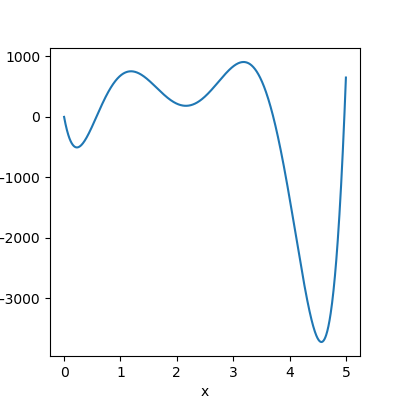

In [63]:
x = np.linspace(0,5,1000)
p = lambda x:100*x**6 - 1359*x**5 + 6836*x**4 - 15670*x**3 + 15870*x**2 - 5095*x
fig = plt.figure(figsize=(4,4))
plt.plot(x,p(x));
plt.xlabel('x');
plt.ylabel('y');

Find all of the local minima and maxima.  Your code should display nicely formatted output.  Include both the location ($x$) and the value of the profit ($p(x)$) for each extrema.

<font color = "blue"> *** 4 points -  code in cell below *** (don't delete this cell) </font>

In [123]:
def f_optimizer(max_x, randu = False):
    minima_set = set()
    maxima_set = set()

    if randu == False:
        iterable = range(0,max_x+1)
    else:
        np.random.seed(6)
        iterable = np.random.uniform(0,max_x+1,1000)
    
    for i in iterable:
        minima = minimize(p,i)
        maxima = minimize(lambda x: -p(x), i)

        if isinstance(minima.fun,np.ndarray):
            minima.fun = minima.fun[0]

        if isinstance(maxima.fun,np.ndarray):
            maxima.fun = maxima.fun[0]

        minima_coords = tuple((round(minima.x[0],4), round(minima.fun,4)))
        minima_set.add(minima_coords)

        if round(maxima.x[0],4) >= 0 and round(maxima.x[0],4) <= max_x+1:
            x_val = round(np.abs(maxima.x[0]),4)
            y_val = round(np.abs(maxima.fun),4)
            maxima_coords = tuple((x_val, y_val))
            maxima_set.add(maxima_coords)

    minima_set = sorted(minima_set, key=lambda x: x[0])
    maxima_set = sorted(maxima_set, key=lambda x: x[0])
    
    return(minima_set, maxima_set)

def get_max_profit(maxima_set):
    max_profit = max(maxima_set, key = lambda x: x[1])
    print(f"Max value of profit is ${max_profit[1]} at x = {max_profit[0]}")

def print_results(minima_set,maxima_set):
    print(f"Minima:")
    for i, coords in enumerate(minima_set,1):
        print(f"\t{i}: {coords}")

    print(f"Maxima:")
    for i, coords in enumerate(maxima_set,1):
        print(f"\t{i}: {coords}")

minima_set, maxima_set = f_optimizer(5)
print_results(minima_set, maxima_set)

Minima:
	1: (0.2277, -504.751)
	2: (2.1612, 183.0706)
	3: (4.5651, -3719.64)
Maxima:
	1: (1.1872, 753.4511)
	2: (3.1839, 906.9019)


Write a multistart procedure that starts from uniform randomly sampled points in $[0,5]$ to locate the absolute maximum value of profit.  

<font color = "blue"> *** 4 points -  code in cell below *** (don't delete this cell) </font>

In [124]:
minima_set, maxima_set = f_optimizer(5, randu = True)
get_max_profit(maxima_set)

Max value of profit is $906.9019 at x = 3.1839


# Simple Linear Regression

To find the line of least squares fit of the form $\hat{y} = b_0 + b_1 x$ to fit data of the form $(x_1,y_1), (x_2,y_2),\ldots,(x_n,y_n)$ we minimize a loss function.  The loss function is the sum of the squares residuals and only depends on $b_0$ and $b_1$ for fixed $xy$-data:

$$ SS(b_0,b_1) = \sum_{i=1}^{n} \left( y_i - \hat{y}_i \right)^2 = \sum_{i=1}^{n} \left( y_i - (b_0 + b_1 x_i) \right)^2 $$.

The file age_height.csv contains ages (years) and heights (inches) for 7 children. Write Python code to evaluate the loss function (follow along with the logistic regression example) and use `minimize` to identify the coefficients of the line of least squares fit for predicting height ($y$) from ($age$).  Include a scatter plot of the data that includes a plot of the line.

<font color = "blue"> *** 8 points -  answer in cell below *** (don't delete this cell) </font>

<IPython.core.display.Javascript object>


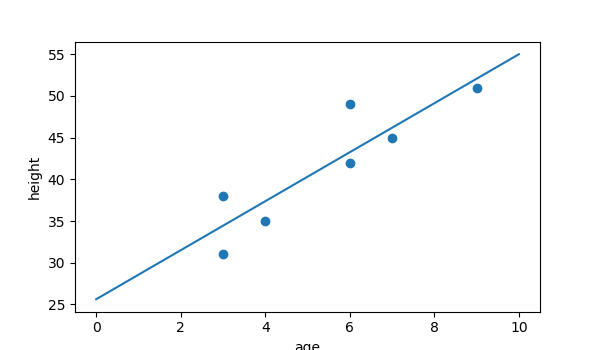

In [184]:
# get x and y
import pandas as pd
df = pd.read_csv('data/age_height.csv')
age = df.age.values
height = df.height.values

# specify loss function
def loss(coef, *args):
    b0 = coef[0]
    b1 = coef[1]
    x = args[0]
    y = args[1]
    p = sum((y-(b0 + b1*x))**2)
    return(p)

# calculate coefficients
result = minimize(loss,[0,0],args=(age,height))
b0 = result.x[0]
b1 = result.x[1]

# plot data and line
x_values = np.linspace(0,10,101)

def linear(x,intercept,slope):
    return(intercept + slope*x)

y_pred = linear(x_values, b0, b1)

fig, ax = plt.subplots()
fig.set_size_inches(6,3.5);
ax.scatter(age, height);
ax.plot(x_values, y_pred);
ax.set_xlabel('age');
ax.set_ylabel('height');

# Knapsack Optimization

The knapsack problem is a classical combinatorial optimization problem that will be good for practicing with the ideas of discrete local search and multistart.  Given a set of items, each with a weight and a value, determine which items to include in a collection so that the total weight is less than or equal to a given limit and the total value is as large as possible.  In the 0-1 version of the knapsack problem, the decision variables are binary (or boolean) and represent whether or not to include each item in the collection.  We'll start with 20 items and you need to determine the collection of items that maximizes the value and keeps the total weight under 50.

In [1]:
# generate random weights and values for a knapsack problem
import numpy as np
num_items = 20
np.random.seed(seed=123)
values = np.random.randint(low=5, high=50, size=num_items)
weights = np.random.randint(low=1, high=10, size=num_items)
max_weight = 50
np.random.seed() # use system clock to reset the seed so future random numbers will appear random

The variables will be a vector of booleans of length `num_items`.  We could initialize a vector like this and then set the vector to include the 1st, 3rd, and 5th items:

In [2]:
x = np.zeros(num_items, dtype = bool) # all false
x[[0,2,4]] = True
x

array([ True, False,  True, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False])

The total weight of the items included in the collection:

In [191]:
tot_weight = sum( weights[x] )
tot_weight

11

The total value of the items included in the collection:

In [192]:
tot_value = sum( values[x] )
tot_value

68

Implement a local search where the search starts with no items included in the collection and generates new states (moves) by randomly choosing one of the booleans in the state vector and toggling it.  Like this:

In [214]:
# try executing this cell a few times and watch x change
bit_to_flip = np.random.randint(num_items)
x[bit_to_flip] = ~x[bit_to_flip]
x

array([False, False,  True,  True,  True,  True,  True,  True, False,
       False, False,  True,  True, False, False, False,  True, False,
       False, False])

Accept the state if the total weight is is $\leq 50$ and maximize the value by moving uphill

(a) Write a local search algorithm that moves uphill  until no improvements have been made in the last 1000 iterations.  Write the algorithm as a function with the values and weights as inputs and returns the best collection of items to include as well as the value and weight of that collection.

<font color = "blue"> *** 5 points -  answer in cell below *** (don't delete this cell) </font>

In [11]:
import pprint as pp

In [48]:
def knapsack_local(num_items, weights, values):
    selected_items = False
    starting_weight = 0
    starting_value = 0
    max_value = 0
    count_iter = 0
    
    while count_iter < 1000:
        item = np.random.choice(20, 1)

        if isinstance(selected_items,bool):
            selected_items = item
        else:    
            if item not in selected_items:
                item_weight = sum(weights[item])
                
                if starting_weight + item_weight <= 50:
                    selected_items = np.append(selected_items, item)
                    starting_weight = sum(weights[selected_items])
                    starting_value = sum(values[selected_items])

                elif starting_weight + item_weight > 50:
                    if starting_value > max_value:
                        max_value = starting_value
                        final_weight = starting_weight
                        final_knapsack = selected_items

                    starting_value = 0
                    starting_weight = 0
                    selected_items = False
            else:
                continue

        count_iter += 1

    print(final_knapsack, final_weight, max_value)
knapsack_local(20, weights, values)

1 [ 3 14] 5 67
1 [ 3 14 13] 12 97
1 [ 3 14 13 11] 16 134
1 [ 3 14 13 11  4] 21 156
1 [ 3 14 13 11  4 17] 24 193
1 [ 3 14 13 11  4 17  1] 32 226
1 [ 3 14 13 11  4 17  1 18] 34 247
1 [ 3 14 13 11  4 17  1 18 15] 40 266
1 [ 3 14 13 11  4 17  1 18 15  6] 43 313
1 [ 3 14 13 11  4 17  1 18 15  6 12] 48 350
2 [ 3 14 13 11  4 17  1 18 15  6 12] 48 350
1 [19 12] 14 46
1 [19 12 10] 22 60
1 [19 12 10  5] 30 84
1 [19 12 10  5 15] 36 103
1 [19 12 10  5 15 14] 38 127
1 [19 12 10  5 15 14  7] 43 154
1 [19 12 10  5 15 14  7  0] 45 161
1 [19 12 10  5 15 14  7  0 17] 48 198
1 [19 12 10  5 15 14  7  0 17  9] 49 235
1 [1 9] 9 70
1 [ 1  9 10] 17 84
1 [ 1  9 10 16] 24 125
1 [ 1  9 10 16 13] 31 155
1 [ 1  9 10 16 13 15] 37 174
1 [ 1  9 10 16 13 15  6] 40 221
1 [ 1  9 10 16 13 15  6  5] 48 245
1 [ 1  9 10 16 13 15  6  5  0] 50 252
1 [16 12] 12 78
1 [16 12 17] 15 115
1 [16 12 17  5] 23 139
1 [16 12 17  5  7] 28 166
1 [16 12 17  5  7  4] 33 188
1 [16 12 17  5  7  4  1] 41 221
1 [16 12 17  5  7  4  1 19] 50 230


1 [16 11  5  3 17 10  7  0] 40 230
1 [16 11  5  3 17 10  7  0 15] 46 249
1 [ 6 14] 5 71
1 [ 6 14  9] 6 108
1 [ 6 14  9  1] 14 141
1 [ 6 14  9  1 11] 18 178
1 [ 6 14  9  1 11 18] 20 199
1 [ 6 14  9  1 11 18 12] 25 236
1 [ 6 14  9  1 11 18 12 19] 34 245
1 [ 6 14  9  1 11 18 12 19  5] 42 269
1 [ 6 14  9  1 11 18 12 19  5  7] 47 296
1 [ 3 15] 9 62
1 [ 3 15 19] 18 71
1 [ 3 15 19  0] 20 78
1 [ 3 15 19  0 14] 22 102
1 [ 3 15 19  0 14 18] 24 123
1 [ 3 15 19  0 14 18  7] 29 150
1 [ 3 15 19  0 14 18  7 16] 36 191
1 [ 3 15 19  0 14 18  7 16 13] 43 221
1 [ 3 15 19  0 14 18  7 16 13  9] 44 258
1 [ 3 15 19  0 14 18  7 16 13  9 11] 48 295
1 [15 14] 8 43
1 [15 14 11] 12 80
1 [15 14 11  7] 17 107
1 [15 14 11  7  5] 25 131
1 [15 14 11  7  5 16] 32 172
1 [15 14 11  7  5 16 18] 34 193
1 [15 14 11  7  5 16 18  3] 37 236
1 [15 14 11  7  5 16 18  3  1] 45 269
1 [15 14 11  7  5 16 18  3  1  6] 48 316
1 [18 15] 8 40
1 [18 15  4] 13 62
1 [18 15  4  6] 16 109
1 [18 15  4  6  7] 21 136
1 [18 15  4  6  7  9] 22 17

(b) Now write a loop to do this 100 local searches (each with random moves starting from a collection with no items in it.  Clearly identify the best overall solution.  Next week we'll see some alternative search tecniques that will generally enable us to find better solutions.

<font color = "blue"> *** 5 points -  answer in cell below *** (don't delete this cell) </font>